In [ ]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#%matplotlib widget

#Read SNP data
df = pd.read_feather("data/processed/massBV.feather")

island_count = df.hatchisland.value_counts()    

#Remove islands with less than 10 (or some other number) observations
def filter_islands(df, island_count, threshold):
    islands = island_count[island_count > threshold].index
    return df[df.hatchisland.isin(islands)]

df = filter_islands(df, island_count, 10)

#Set X to be SNP data
X = np.nan_to_num(df.iloc[:, 9:].values)

# Center and scale each feature
X -= np.mean(X, axis=0)
X /= np.std(X, axis=0)

#Run t-SNE for two dimensions. Set perplexity
tsne = TSNE(n_components=3, random_state=42, perplexity=50, metric='cosine')
X_tsne = tsne.fit_transform(X)


#Plot t-SNE
#All islands to be included
classes = island_count[island_count > 10].index
n_islands = len(classes)
#Colors for each island
colors = ['red', 'blue', 'green', 'orange', 'purple', 'cyan', 'magenta', 'yellow']




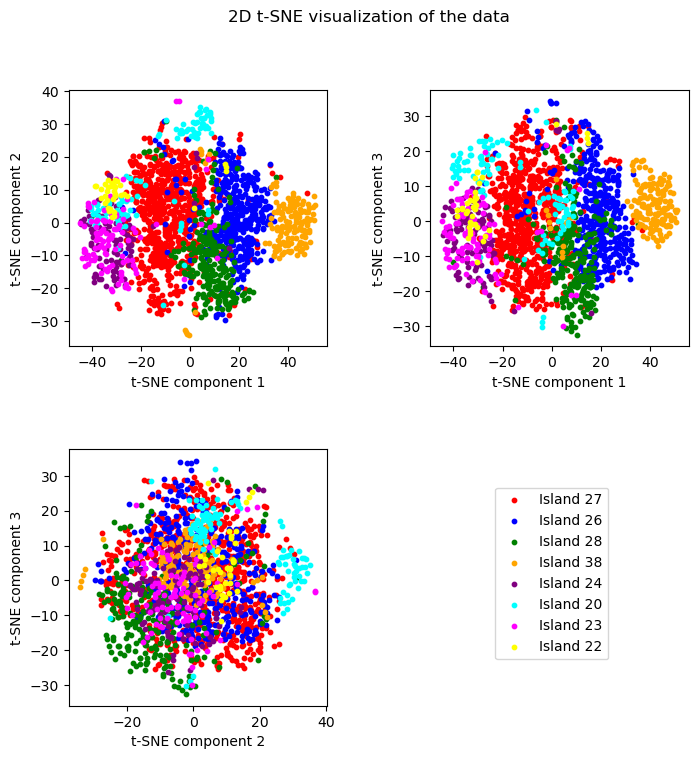

In [2]:
# Plot 2D plots of the t-SNE projections, first 1 vs 2, then 1 vs 3, then 2 vs 3
fig = plt.figure(figsize=(8, 8))
fig.tight_layout(pad=3.0)
ax = fig.add_subplot(221)
plt.suptitle('2D t-SNE visualization of the data')

for i in range(n_islands):
    # indexes for individuals in island classes[i]
    indexes = (df['hatchisland'] == classes[i])
    ax.scatter(X_tsne[indexes, 0], X_tsne[indexes, 1], c=colors[i], label=f'island {classes[i]}', s=10)

ax.set_xlabel('t-SNE component 1')
ax.set_ylabel('t-SNE component 2')

ax = fig.add_subplot(222)

for i in range(n_islands):
    # indexes for individuals in island classes[i]
    indexes = (df['hatchisland'] == classes[i])
    ax.scatter(X_tsne[indexes, 0], X_tsne[indexes, 2], c=colors[i], label=f'island {classes[i]}', s=10)

ax.set_xlabel('t-SNE component 1')
ax.set_ylabel('t-SNE component 3')

ax = fig.add_subplot(223)

for i in range(n_islands):
    # indexes for individuals in island classes[i]
    indexes = (df['hatchisland'] == classes[i])
    ax.scatter(X_tsne[indexes, 1], X_tsne[indexes, 2], c=colors[i], label=f'Island {classes[i]}', s=10)

ax.set_xlabel('t-SNE component 2')
ax.set_ylabel('t-SNE component 3')
ax.legend(bbox_to_anchor=(1.65, 0.85), loc='upper left', borderaxespad=0.)

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()
